# Create 5 models for Customer Churn Prediction 
1.Linear Regression   2.Decision Tree   3.Random Forest   4.XGBoost   5.Neural Network

In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, classification_report,roc_auc_score
from matplotlib import pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from google.colab import drive

# draw ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def plot_roc_curve(test_y, probs):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(test_y))]
    # calculate scores
    ns_auc = roc_auc_score(test_y, ns_probs)
    auc = roc_auc_score(test_y, probs)
    # summarize scores
    #print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC: %.3f' % (auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
    fpr, tpr, _ = roc_curve(test_y, probs)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, linestyle='--', label='Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.ylim((0,1))
    plt.xlim((0,1))
    plt.legend()
    # show the plot
    plt.show()

def get_accuracy(y_true,y_pred):
    return sum(y_true==y_pred)/len(y_true)

def plot_confusion_matrix(cm):
    import matplotlib.pyplot as plt
    from itertools import product
    import numpy as np
    fig, ax = plt.subplots()
    cmap='Blues'
    im_ = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    xlen,ylen = cm.shape
    thresh = (cm.max() + cm.min()) / xlen
    display_labels=(0,1)
    cmap_min, cmap_max = im_.cmap(0), im_.cmap(256)
    for i, j in product(range(xlen), range(xlen)):
        color = cmap_max if cm[i, j] < thresh else cmap_min
        ax.text(j, i,format(cm[i, j], '.0f'),ha="center", va="center",color=color)
    fig.colorbar(im_, ax=ax)
    ax.set(xticks=np.arange(xlen),
        yticks=np.arange(ylen),
        xticklabels=display_labels,
        yticklabels=display_labels,
        ylabel="True label",
        xlabel="Predicted label")
    ax.set_ylim((2 - 0.5, -0.5))
    plt.show()
    return None

def evaluation(X_test, clf, y_test):
  y_pred = clf.predict(X_test)
  print('Classification Report')
  print(classification_report(y_test, y_pred))

  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ',np.round(accuracy*100, 2), '%')
      
  #print('F1-Score: ',np.round(f1_score(y_test, y_pred)*100,2), '%')

def evaluation_nn(X_test, clf, y_test):
  y_pred = (clf.predict(X_test)>0.5).reshape(y_test.shape)
  print('Classification Report')
  print(classification_report(y_test, y_pred))

  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ',np.round(accuracy*100, 2), '%')
      
  #print('F1-Score: ',np.round(f1_score(y_test, y_pred)*100,2), '%')
    


drive.mount('/content/drive')
#Importing data
dataset = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv',delimiter=",")
#Printing head
df = dataset.copy()
df.head(10)


Mounted at /content/drive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data cleaning
find errors in dataset

In [ ]:
errors=[]
for i in df['Age']:
    try:
        i = int(i)
    except:
        errors.append(i)
print(errors)

[]


In [ ]:
errors =[]
for i in df['Balance']:
    try:
        i = int(i)
    except:
        errors.append(i)
print(errors)
 

[]


Find outliers (in balance) and replace them by the mean of the 
dataset

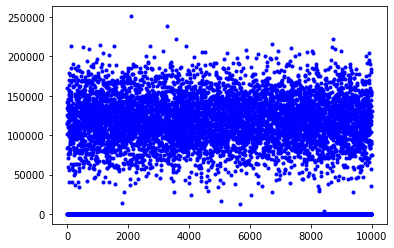

In [ ]:
x = list(range(0,len(df['Balance'])))
y = df['Balance']
plt.scatter(x,y,c='b',marker='.')

In [ ]:
from collections import Counter
print(Counter(df['Exited']))

Counter({0: 7963, 1: 2037})


# One-Hot encoding


In [2]:
df=dataset
df["Gender"]=df["Gender"].map(lambda x: 0 if x=='Female' else 1)
X_initial = df.iloc[:,3:13]
y_initial = df.iloc[:,13]
geography = pd.get_dummies(df['Geography'],drop_first=True)
X_initial= pd.concat([X_initial, geography], axis=1)
X_initial = X_initial.drop(['Geography'], axis=1)
X_initial.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,0


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
#X["Exited"]=y
#X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,1,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,0,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 1. Linear Regression

## create logit regression model 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


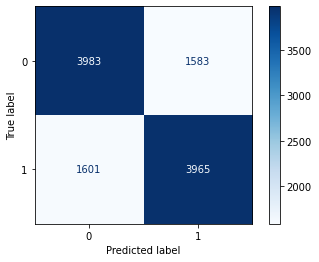

Linear Regression Trainset Accuracy: 71.40%


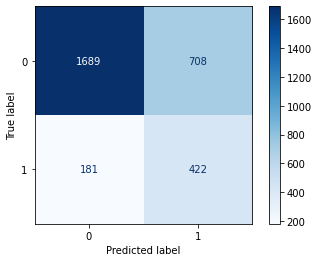

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2397
           1       0.37      0.70      0.49       603

    accuracy                           0.70      3000
   macro avg       0.64      0.70      0.64      3000
weighted avg       0.80      0.70      0.73      3000

Accuracy:  70.37 %
Recall:    69.98%
Logistic: ROC AUC: 0.770


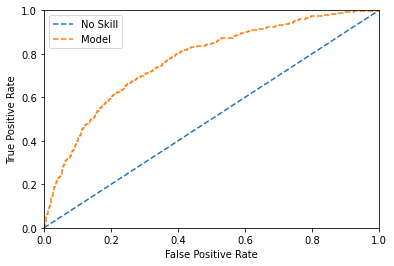

In [ ]:
#split dataset into trainset and testset with 0.3 ratio
X_train, X_test, y_train, y_test = train_test_split(X_initial, y_initial, test_size=0.30, random_state=2020)

from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_train, y_train = smo.fit_sample(X_train, y_train)
#print(Counter(y_train))

#scaling to around 0 to 1 
scaler = preprocessing.MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

linear_classifier = linear_model.LogisticRegression(random_state=2020)
linear_classifier.fit(scaled_X_train, y_train)
y_train_pred = linear_classifier.predict(scaled_X_train)
y_pred = linear_classifier.predict(scaled_X_test)
probs = linear_classifier.predict_proba(scaled_X_test)

cm = confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(cm)
print("Linear Regression Trainset Accuracy: {0:.2f}%".format(get_accuracy(y_train, y_train_pred)*100))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
score0=get_accuracy(y_test, y_pred)
#print("Linear Regression Testset Accuracy: {0:.2f}%".format(get_accuracy(y_test, y_pred)*100))
recall0= (cm[1,1])/(cm[1,0]+cm[1,1])
print('Logistic Regression')
evaluation(scaled_X_test, linear_classifier, y_test)
print("Recall:    %.2f%%" % (recall0*100))
plot_roc_curve(y_test, probs[:,1])



In [ ]:
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
logitfit = sm.Logit(y_train,sm.add_constant(scaled_X_train)).fit()
 
print(logitfit.summary())

Optimization terminated successfully.
         Current function value: 0.565856
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                11132
Model:                          Logit   Df Residuals:                    11120
Method:                           MLE   Df Model:                           11
Date:                Sat, 03 Oct 2020   Pseudo R-squ.:                  0.1836
Time:                        12:26:37   Log-Likelihood:                -6299.1
converged:                       True   LL-Null:                       -7716.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1455      0.124     -9.224      0.000      -1.389      -0.902
x1            -0.6507      0.

## Improve regression - Selecting statistically significant features

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


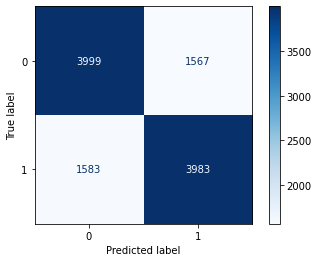

Improved Linear Regression Trainset Accuracy: 71.70%


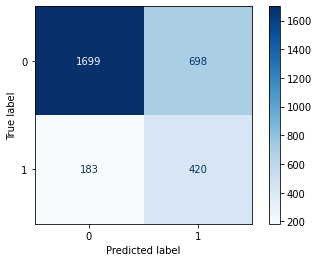

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2397
           1       0.38      0.70      0.49       603

    accuracy                           0.71      3000
   macro avg       0.64      0.70      0.64      3000
weighted avg       0.80      0.71      0.73      3000

Accuracy:  70.63 %
Recall:    69.65%
Logistic: ROC AUC: 0.770


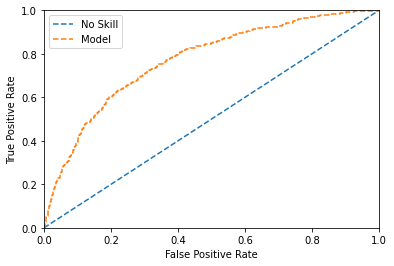

In [20]:
X_reduced=X_initial.iloc[:,[0,1,2,3,4,5,7,9]]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_initial, test_size=0.30, random_state=2020)

from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_train, y_train = smo.fit_sample(X_train, y_train)

scaler = preprocessing.MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
 

linear_classifier = linear_model.LogisticRegression(random_state=2020)
linear_classifier.fit(scaled_X_train, y_train)
y_train_pred = linear_classifier.predict(scaled_X_train)
y_pred = linear_classifier.predict(scaled_X_test)
probs = linear_classifier.predict_proba(scaled_X_test)

cm = confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(cm)
print("Improved Linear Regression Trainset Accuracy: {0:.2f}%".format(get_accuracy(y_train, y_train_pred)*100))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
score1=get_accuracy(y_test, y_pred)
#print("Linear Regression Testset Accuracy: {0:.2f}%".format(get_accuracy(y_test, y_pred)*100))
recall1= (cm[1,1])/(cm[1,0]+cm[1,1])
auc1 = roc_auc_score(y_test, probs[:,1])
print('Logistic Regression')
evaluation(scaled_X_test, linear_classifier, y_test)
print("Recall:    %.2f%%" % (recall1*100))
plot_roc_curve(y_test, probs[:,1])

In [ ]:
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
logitfit = sm.Logit(y_train,sm.add_constant(scaled_X_train)).fit()
 
print(logitfit.summary())

Optimization terminated successfully.
         Current function value: 0.562992
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                11132
Model:                          Logit   Df Residuals:                    11123
Method:                           MLE   Df Model:                            8
Date:                Sat, 03 Oct 2020   Pseudo R-squ.:                  0.1878
Time:                        12:30:32   Log-Likelihood:                -6267.2
converged:                       True   LL-Null:                       -7716.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1755      0.108    -10.897      0.000      -1.387      -0.964
x1            -0.5832      0.

# 2. Decision Tree


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


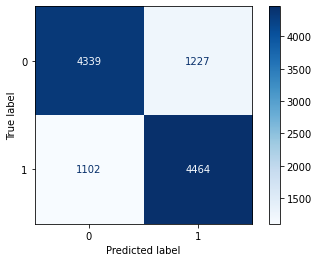

Train_Accuracy: 79.08%


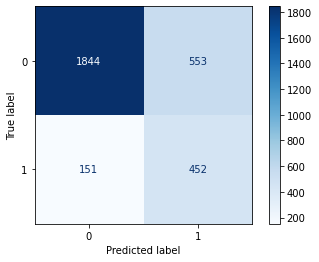

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2397
           1       0.45      0.75      0.56       603

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.77      0.78      3000

Accuracy:  76.53 %
Recall:    74.96%
Logistic: ROC AUC: 0.831


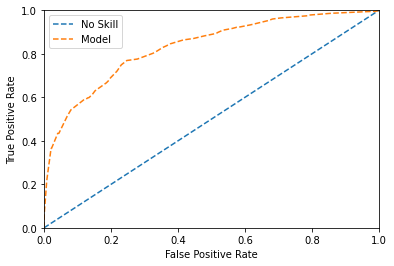

In [85]:
X_reduced1=X_initial.iloc[:,[1,2,5,7,9]]
X_train, X_test, y_train, y_test = train_test_split(X_reduced1, y_initial, test_size=0.30, random_state=2020)

from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_train, y_train = smo.fit_sample(X_train, y_train)

scaler = preprocessing.MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

estimator = tree.DecisionTreeClassifier(ccp_alpha=0.00042182637729348246)
estimator = estimator.fit(scaled_X_train, y_train)
y_train_pred= estimator.predict(scaled_X_train)
y_pred = estimator.predict(scaled_X_test)

cm_train= confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(cm_train)
print("Train_Accuracy: {0:.2f}%".format(get_accuracy(y_train, y_train_pred)*100))

probs = estimator.predict_proba(scaled_X_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
score2=get_accuracy(y_test, y_pred)
#print("Linear Regression Testset Accuracy: {0:.2f}%".format(get_accuracy(y_test, y_pred)*100))
recall2= (cm[1,1])/(cm[1,0]+cm[1,1])
auc2 = roc_auc_score(y_test, probs[:,1])
print('Logistic Regression')
evaluation(scaled_X_test, estimator, y_test)
print("Recall:    %.2f%%" % (recall2*100))
plot_roc_curve(y_test, probs[:,1])


n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left 

children_right = estimator.tree_.children_right
feature = estimator.tree_.feature   
threshold = estimator.tree_.threshold 


[Text(166.70250000000001, 208.38, 'X[7] <= 1.0\ngini = 0.264\nsamples = 35566\nvalue = [5566, 30000]'),
 Text(98.3475, 190.26, 'X[2] <= 0.257\ngini = 0.16\nsamples = 28403\nvalue = [2483, 25920]'),
 Text(73.935, 172.14, 'X[7] <= 0.0\ngini = 0.386\nsamples = 5864\nvalue = [1531, 4333]'),
 Text(68.355, 154.01999999999998, 'X[5] <= 0.333\ngini = 0.483\nsamples = 3753\nvalue = [1531, 2222]'),
 Text(53.01, 135.89999999999998, 'X[5] <= 0.0\ngini = 0.396\nsamples = 2483\nvalue = [675, 1808]'),
 Text(47.43, 117.77999999999999, 'X[1] <= 1.0\ngini = 0.47\nsamples = 1791\nvalue = [675, 1116]'),
 Text(33.480000000000004, 99.66, 'X[1] <= 0.0\ngini = 0.37\nsamples = 1111\nvalue = [272, 839]'),
 Text(27.9, 81.53999999999999, 'X[4] <= 0.692\ngini = 0.498\nsamples = 584\nvalue = [272, 312]'),
 Text(22.32, 63.41999999999999, 'X[9] <= 0.001\ngini = 0.5\nsamples = 523\nvalue = [265, 258]'),
 Text(11.16, 45.29999999999998, 'X[4] <= 0.246\ngini = 0.472\nsamples = 324\nvalue = [200, 124]'),
 Text(5.58, 27.17

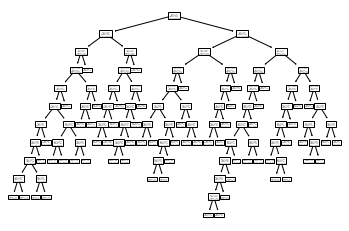

In [ ]:
tree.plot_tree(estimator)

## post-pruning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

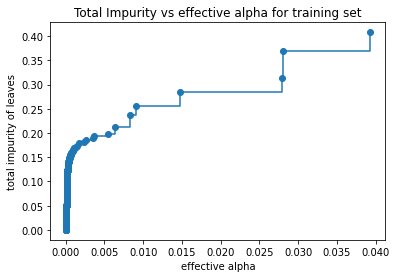

In [ ]:
clf=estimator
path = clf.cost_complexity_pruning_path(scaled_X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

## The relationship between alpha and accuracy for training and testing sets

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09216161772225545


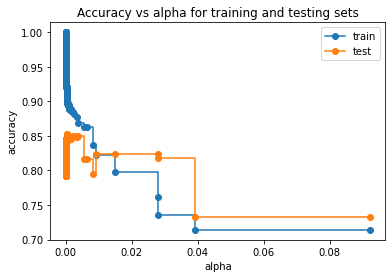

DecisionTreeClassifier(ccp_alpha=0.00042182637729348246, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')
Desicion Tree highest validation accuracy: 85.20%


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

max_score=0
for i in range(len(test_scores)):
  if test_scores[i]>max_score:
    max_score=test_scores[i]
    max_index=i
    
print(clfs[max_index])
print('Desicion Tree highest validation accuracy: %.2f%%' % (max(test_scores)*100))


# 3. Random Forest


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5950) in class 1 will be larger than the number of samples in the majority class (class #0 -> 5566)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Random Forest


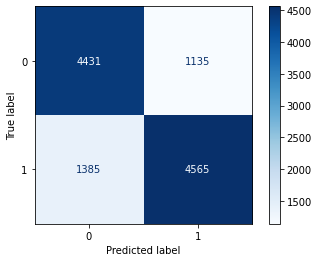

Random Forest TrainSet: Accurarcy 78.12%


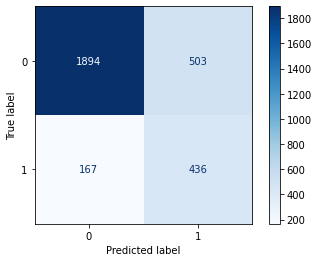

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2397
           1       0.46      0.72      0.57       603

    accuracy                           0.78      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.83      0.78      0.79      3000

Accuracy:  77.67 %
Recall:    72.31%
Logistic: ROC AUC: 0.844


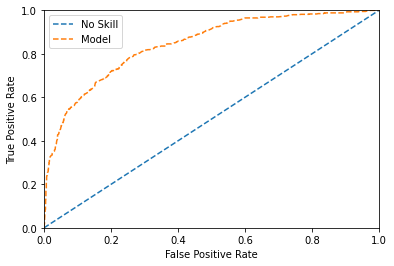

In [21]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

X_reduced2=X_initial.iloc[:,[1,2,5,7,9]]

X_train, X_test, y_train, y_test = train_test_split(X_reduced2, y_initial, test_size=0.30, random_state=2020)

from imblearn.over_sampling import SMOTE
smo = SMOTE(ratio={1:5950},random_state=42)
X_train, y_train = smo.fit_sample(X_train, y_train)

scaler = preprocessing.MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model3 = RandomForestClassifier(n_estimators=500, max_depth=5,random_state=0)
model3.fit(scaled_X_train, y_train)
y_predicted3 = model3.predict(scaled_X_test)

y_pred_train3 = model3.predict(scaled_X_train)
cm_train3 = confusion_matrix(y_train,y_pred_train3)
print("Random Forest")
print("================================")
plot_confusion_matrix(cm_train3)
acc_train3 = (cm_train3[0,0] + cm_train3[1,1]) / sum(sum(cm_train3))
print("Random Forest TrainSet: Accurarcy %.2f%%" % (acc_train3*100))
print("================================")
y_pred3 = model3.predict(scaled_X_test)
probs = model3.predict_proba(scaled_X_test)
cm = confusion_matrix(y_test,y_pred3)
plot_confusion_matrix(cm)
score3=get_accuracy(y_test, y_pred3)
#print("Linear Regression Testset Accuracy: {0:.2f}%".format(get_accuracy(y_test, y_pred)*100))
recall3= (cm[1,1])/(cm[1,0]+cm[1,1])
auc3 = roc_auc_score(y_test, probs[:,1])
print('Logistic Regression')
evaluation(scaled_X_test, model3, y_test)
print("Recall:    %.2f%%" % (recall3*100))
plot_roc_curve(y_test, probs[:,1])

# 4.XGBoost

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (25000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 5566)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


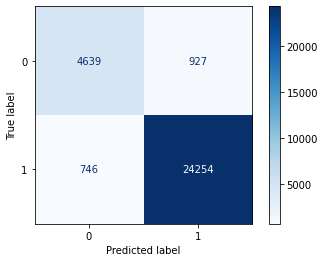

Xgboost TrainSet: Accurarcy 94.53%


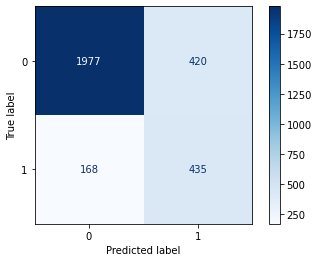

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2397
           1       0.51      0.72      0.60       603

    accuracy                           0.80      3000
   macro avg       0.72      0.77      0.73      3000
weighted avg       0.84      0.80      0.82      3000

Accuracy:  80.4 %
Recall:    72.14%
Logistic: ROC AUC: 0.859


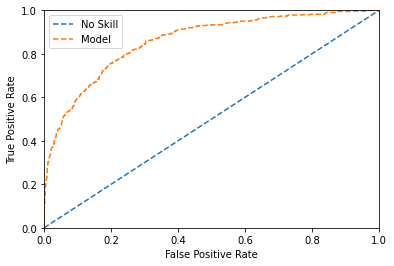

In [78]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

X_reduced3=X_initial.iloc[:,[1,2,4,5,7,9]]
X_train, X_test, y_train, y_test = train_test_split(X_reduced3, y_initial, test_size=0.30, random_state=2020)

from imblearn.over_sampling import SMOTE
smo = SMOTE(ratio={1:25000},random_state=42)
X_train, y_train = smo.fit_sample(X_train, y_train)

scaler = preprocessing.MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model4 = GradientBoostingClassifier(random_state=0)
model4.fit(scaled_X_train, y_train)
y_pred_train4 = model4.predict(scaled_X_train)
cm4_train = confusion_matrix(y_train,y_pred_train4)
plot_confusion_matrix(cm4_train)
acc_train4 = (cm4_train[0,0] + cm4_train[1,1]) / sum(sum(cm4_train))
print("Xgboost TrainSet: Accurarcy %.2f%%" % (acc_train4*100))
predictions = model4.predict(scaled_X_test)
y_pred4 = (predictions > 0.5)
y_pred4 =y_pred4*1 #convert to 0,1 instead of True False
cm = confusion_matrix(y_test, y_pred4)
probs = model4.predict_proba(scaled_X_test)
cm = confusion_matrix(y_test,y_pred4)
plot_confusion_matrix(cm)
score4=get_accuracy(y_test, y_pred4)
#print("Linear Regression Testset Accuracy: {0:.2f}%".format(get_accuracy(y_test, y_pred)*100))
recall4= (cm[1,1])/(cm[1,0]+cm[1,1])
auc4 = roc_auc_score(y_test, probs[:,1])
print('Logistic Regression')
evaluation(scaled_X_test, model4, y_test)
print("Recall:    %.2f%%" % (recall4*100))
plot_roc_curve(y_test, probs[:,1])

# 5. Neural Network

In [55]:
import tensorflow
from keras import backend as K
from keras.models import Input, Model
from keras.layers import Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(X_initial, y_initial, test_size=0.20, random_state=2020)

from imblearn.over_sampling import SMOTE
smo = SMOTE(ratio={1:18000},random_state=42)
X_train, y_train = smo.fit_sample(X_train, y_train)

scaler = preprocessing.MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

def get_model(input_dim):
    i = Input(shape=(input_dim,))
    x = Dense(216, activation='relu')(i)
    x = Dropout(0.2)(x)
    x = Dense(216, activation='sigmoid')(i)
    x = Dropout(0.2)(x)
    x = Dense(1, activation='relu')(x)
    model = Model(inputs=[i], outputs=[x])
    model.compile(loss='binary_crossentropy',
              optimizer='Rmsprop',
              metrics=['accuracy'])
    print(model.summary())
    return model

nn = get_model(11)
nn.fit(scaled_X_train, y_train,
        batch_size=128, epochs=300,
        validation_split = 0.2,
        verbose=1)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (18000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 6382)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 11)]              0         
_________________________________________________________________
dense_46 (Dense)             (None, 216)               2592      
_________________________________________________________________
dropout_31 (Dropout)         (None, 216)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 217       
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
153/153 [==============================] - 0s 3ms/step - loss: 1.8601 - accuracy: 0.5571 - val_loss: 0.4221 - val_accuracy: 0.9928
Epoch 2/300
153/153 [==============================] - 0s 2ms/step - loss: 1.4922 - accuracy: 0.5931 

63/63 [==============================] - 0s 900us/step - loss: 0.5151 - accuracy: 0.7645


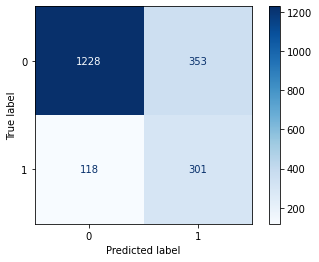

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1581
           1       0.46      0.72      0.56       419

    accuracy                           0.76      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.76      0.78      2000

Accuracy:  76.45 %
Recall:    71.84%
Logistic: ROC AUC: 0.838


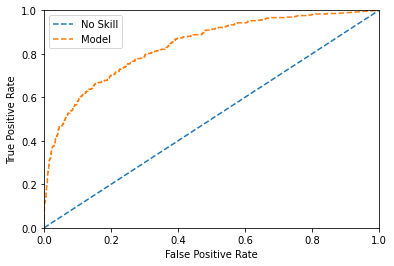

In [56]:

loss, acc = nn.evaluate(scaled_X_test, y_test)
y_pred5 =  (nn.predict(scaled_X_test)>0.5).reshape(y_test.shape)
probs = nn.predict(scaled_X_test)
cm = confusion_matrix(y_test,y_pred5)
plot_confusion_matrix(cm)
score5=get_accuracy(y_test, y_pred5)
#print("Linear Regression Testset Accuracy: {0:.2f}%".format(get_accuracy(y_test, y_pred)*100))
recall5= (cm[1,1])/(cm[1,0]+cm[1,1])
auc5 = roc_auc_score(y_test, probs)
print('Logistic Regression')
evaluation_nn(scaled_X_test, nn, y_test)
print("Recall:    %.2f%%" % (recall5*100))
plot_roc_curve(y_test, probs)

In [ ]:
#X_train.shape

(25566, 11)

#Comparison: 
1.Linear Regression   2.Decision Tree   3.Random Forest   4.XGBoost   5.Neural Network

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

th_props = [
  ('font-size', '28px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#021755'),
  ('background-color', '#fbe4e5')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '25px'),
  ('background-color', '#f7f2ed')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

d = {'Models': ["Logistic Regression","Desicion Tree","Random Forest","XGBoost","Neural Network"], 
     'Accuracy': [score1,score2,score3,score4,score5],
     'Recall':[recall1,recall2,recall3,recall4,recall5],
     'AUC':[auc1,auc2,auc3,auc4,auc5]}
df = pd.DataFrame(data=d)
cm = sns.light_palette("red", as_cmap=True)

(df.style
  .set_caption('Models Comparison')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,Models,Accuracy,Recall,AUC
0,Logistic Regression,0.706333,0.696517,0.770131
1,Desicion Tree,0.765333,0.749585,0.831248
2,Random Forest,0.776667,0.723051,0.843925
3,XGBoost,0.804000,0.721393,0.858907
4,Neural Network,0.764500,0.718377,0.837594


Logistic Regression Feature(not ranking):
feature: 0   score: -0.637408
feature: 1   score: -0.570670
feature: 2   score: 6.364458
feature: 3   score: -0.207881
feature: 4   score: 0.595707
feature: 5   score: -0.390748
feature: 6   score: -0.055775
feature: 7   score: -1.113102
feature: 8   score: 0.127145
feature: 9   score: 0.812524
feature: 10   score: -0.012450


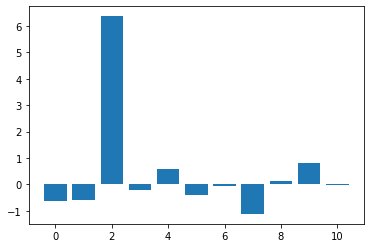

In [ ]:
import numpy 
from matplotlib import pyplot
LG = linear_classifier
importances0 = LG.coef_[0]

# Print the feature ranking
print("Logistic Regression Feature(not ranking):")
for f in range(X_initial.shape[1]):
    print("feature: %s   score: %f" % (f, importances0[f]))
# Plot features
pyplot.bar([x for x in range(len(importances0))], importances0)
pyplot.show()

# Feature importance on Decision Tree

Randam Forest Feature ranking:
feature: 5   score: 0.344345
feature: 2   score: 0.283461
feature: 7   score: 0.221255
feature: 1   score: 0.050601
feature: 4   score: 0.042971
feature: 9   score: 0.039390
feature: 8   score: 0.010350
feature: 0   score: 0.004832
feature: 3   score: 0.002795
feature: 10   score: 0.000000
feature: 6   score: 0.000000


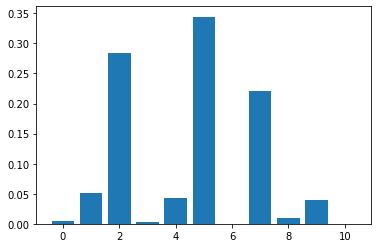

In [84]:
import numpy 
from matplotlib import pyplot
importances = estimator.feature_importances_
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Randam Forest Feature ranking:")

for f in range(X_initial.shape[1]):
    print("feature: %s   score: %f" % (indices[f], importances[indices[f]]))

# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

# Feature importance on Random Forest

Randam Forest Feature ranking:
feature: 2   score: 0.338597
feature: 7   score: 0.219150
feature: 5   score: 0.176417
feature: 1   score: 0.108686
feature: 9   score: 0.086746
feature: 10   score: 0.045154
feature: 6   score: 0.013503
feature: 4   score: 0.010552
feature: 3   score: 0.000953
feature: 0   score: 0.000241
feature: 8   score: 0.000000


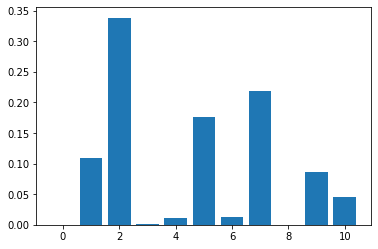

In [ ]:
import numpy 
from matplotlib import pyplot
RF = model3
importances = RF.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Randam Forest Feature ranking:")

for f in range(X_initial.shape[1]):
    print("feature: %s   score: %f" % (indices[f], importances[indices[f]]))
# Plot features
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

# Feature of importance with XGBoost

XGBoost Feature ranking:
feature: 2   score: 0.271486
feature: 5   score: 0.267981
feature: 7   score: 0.221297
feature: 1   score: 0.127652
feature: 9   score: 0.061355
feature: 4   score: 0.026139
feature: 6   score: 0.006991
feature: 10   score: 0.005834
feature: 0   score: 0.004583
feature: 3   score: 0.003747
feature: 8   score: 0.002935


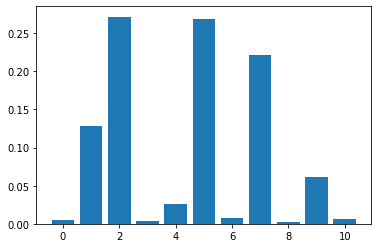

In [ ]:
import numpy 
XG = model4
importances2 = XG.feature_importances_
indices2 = numpy.argsort(importances2)[::-1]

# Print the feature ranking
print("XGBoost Feature ranking:")
for f in range(X_initial.shape[1]):
    print("feature: %s   score: %f" % (indices2[f], importances2[indices2[f]]))
# Plot features
pyplot.bar([x for x in range(len(importances2))], importances2)
pyplot.show()

# Permutation feature importance
Apply this to any sklearn model.
Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.


In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
r = permutation_importance(linear_classifier, scaled_X_test, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{'Feature '+str(i)+'   : '}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")


Feature 2   : 0.064 +/- 0.006
Feature 7   : 0.018 +/- 0.005
Feature 9   : 0.017 +/- 0.004
Feature 1   : 0.008 +/- 0.003
